### Problem Statement:

Description:
The Global Power Plant Database is a comprehensive, open source database of power plants around the world. It centralizes power plant data to make it easier to navigate, compare and draw insights for one’s own analysis. The database covers approximately 35,000 power plants from 167 countries and includes thermal plants (e.g. coal, gas, oil, nuclear, biomass, waste, geothermal) and renewables (e.g. hydro, wind, solar). Each power plant is geolocated and entries contain information on plant capacity, generation, ownership, and fuel type. It will be continuously updated as data becomes available.

Key attributes of the database
The database includes the following indicators:

country` (text): 3 character country code corresponding to the ISO 3166-1 alpha-3 specification [5]

country_long` (text): longer form of the country designation

name` (text): name or title of the power plant, generally in Romanized form

gppd_idnr` (text): 10 or 12 character identifier for the power plant

capacity_mw` (number): electrical generating capacity in megawatts

latitude` (number): geolocation in decimal degrees; WGS84 (EPSG:4326)

longitude` (number): geolocation in decimal degrees; WGS84 (EPSG:4326)

primary_fuel` (text): energy source used in primary electricity generation or export

other_fuel1` (text): energy source used in electricity generation or export

other_fuel2` (text): energy source used in electricity generation or export

other_fuel3` (text): energy source used in electricity generation or export

commissioning_year` (number): year of plant operation, weighted by unit-capacity when data is available

owner` (text): majority shareholder of the power plant, generally in Romanized form

source(text): entity reporting the data; could be an organization, report, or document, generally in Romanized form
url (text): web document corresponding to the source field

geolocation_source` (text): attribution for geolocation information

wepp_id` (text): a reference to a unique plant identifier in the widely-used PLATTS-WEPP database.

year_of_capacity_data` (number): year the capacity information was reported

generation_gwh_2013` (number): electricity generation in gigawatt-hours reported for the year 2013

generation_gwh_2014` (number): electricity generation in gigawatt-hours reported for the year 2014

generation_gwh_2015` (number): electricity generation in gigawatt-hours reported for the year 2015

generation_gwh_2016` (number): electricity generation in gigawatt-hours reported for the year 2016

generation_gwh_2017` (number): electricity generation in gigawatt-hours reported for the year 2017

generation_gwh_2018` (number): electricity generation in gigawatt-hours reported for the year 2018

generation_gwh_2019` (number): electricity generation in gigawatt-hours reported for the year 2019

generation_data_source` (text): attribution for the reported generation information

estimated_generation_gwh_2013` (number): estimated electricity generation in gigawatt-hours for the year 2013

estimated_generation_gwh_2014` (number): estimated electricity generation in gigawatt-hours for the year 2014

estimated_generation_gwh_2015` (number): estimated electricity generation in gigawatt-hours for the year 2015

estimated_generation_gwh_2016` (number): estimated electricity generation in gigawatt-hours for the year 2016

estimated_generation_gwh_2017` (number): estimated electricity generation in gigawatt-hours for the year 2017

estimated_generation_note_2013` (text): label of the model/method used to estimate generation for the year 2013

estimated_generation_note_2014` (text): label of the model/method used to estimate generation for the year 2014

estimated_generation_note_2015` (text): label of the model/method used to estimate generation for the year 2015

estimated_generation_note_2016` (text): label of the model/method used to estimate generation for the year 2016

estimated_generation_note_2017` (text): label of the model/method used to estimate generation for the year 2017

Fuel Type Aggregation
We define the "Fuel Type" attribute of our database based on common fuel categories.

**Prediction : Make two prediction 1) Fuel Type 2) capacity_mw**

In [179]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import seaborn as sn
import numpy as np
import scipy.stats as stats
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.decomposition import PCA
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import random
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import RidgeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LassoLars
from sklearn.linear_model import BayesianRidge
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score,roc_curve
from sklearn.impute import KNNImputer
from sklearn.utils import resample
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.semi_supervised import LabelSpreading,LabelPropagation
from sklearn.ensemble import AdaBoostClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis,LinearDiscriminantAnalysis
from sklearn.calibration import CalibratedClassifierCV
from sklearn.svm import LinearSVC,NuSVC
from sklearn.linear_model import RidgeClassifierCV,PassiveAggressiveClassifier,Perceptron
from sklearn.naive_bayes import GaussianNB,BernoulliNB
from sklearn.neighbors import NearestCentroid
from sklearn.dummy import DummyClassifier
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor,BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR,NuSVR,LinearSVR
from sklearn.linear_model import LinearRegression,Ridge,RidgeCV,BayesianRidge,SGDRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.svm import NuSVR
from sklearn.impute import KNNImputer
from sklearn.cluster import KMeans
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor,XGBRFRegressor
from io import StringIO
from sklearn.tree import export_graphviz
from statsmodels.stats.outliers_influence import variance_inflation_factor
from IPython.display import Image
import os
from sklearn.feature_selection import SelectKBest,chi2
from scipy.stats import randint as sp_randint
from scipy.stats import uniform as sp_uniform
import joblib
%matplotlib inline

#### Uploading dataset

In [180]:
df=pd.read_csv('database_IND.csv')
df

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,WRI,NaN,2018.0,631.777928,617.789264,843.747000,886.004428,663.774500,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,WRI,NaN,2018.0,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736,Central Electricity Authority,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,...,WRI,NaN,2018.0,NaN,NaN,0.994875,233.596650,865.400000,Central Electricity Authority,NaN
904,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,Industry About,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
906,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Analysis

In [181]:
df.columns

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'other_fuel1', 'other_fuel2',
       'other_fuel3', 'commissioning_year', 'owner', 'source', 'url',
       'geolocation_source', 'wepp_id', 'year_of_capacity_data',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_data_source',
       'estimated_generation_gwh'],
      dtype='object')

In [182]:
df.country.value_counts()

IND    908
Name: country, dtype: int64

In [183]:
df.country_long.value_counts()

India    908
Name: country_long, dtype: int64

In [184]:
df.name.value_counts()

SHARAVATHY                  1
STERLITE TPP                1
BSES Kerala CCGT            1
SHAHPUR                     1
KUTTALAM GT                 1
                           ..
UPPER KOLAB                 1
R_GUNDEM STPS               1
HAZIRA-GSECL                1
VIJAYWADA TPP-IV            1
Grewal Solar Power Plant    1
Name: name, Length: 908, dtype: int64

In [185]:
df.gppd_idnr.value_counts()

IND0000375    1
WRI1026189    1
IND0000300    1
WRI1019987    1
IND0000323    1
             ..
WRI1020004    1
WRI1019882    1
WRI1019936    1
IND0000174    1
IND0000451    1
Name: gppd_idnr, Length: 908, dtype: int64

In [186]:
df.wepp_id.value_counts()

Series([], Name: wepp_id, dtype: int64)

In [187]:
df.other_fuel2.value_counts()

Oil    1
Name: other_fuel2, dtype: int64

In [188]:
df.other_fuel3.value_counts()

Series([], Name: other_fuel3, dtype: int64)

In [189]:
df.other_fuel1.value_counts()

Oil             196
Gas               2
Cogeneration      1
Name: other_fuel1, dtype: int64

In [190]:
df.commissioning_year.value_counts()

2013.0    28
2015.0    26
2012.0    23
2016.0    21
2014.0    17
          ..
1939.0     1
1927.0     1
1949.0     1
1956.0     1
1969.0     1
Name: commissioning_year, Length: 73, dtype: int64

In [191]:
df.owner.value_counts()

Sterling Agro Industries ltd.    4
Acc Acc ltd                      4
Jk Cement ltd                    4
Shree Sugars ltd                 3
Enercon India Ltd.               3
                                ..
Datta Ssk ltd                    1
Hare Pvt ltd                     1
Ener-t International Ltd.        1
India Oil Corporation Limited    1
Astonfield Management Limited    1
Name: owner, Length: 280, dtype: int64

In [192]:
df.source.value_counts()

Central Electricity Authority                520
CDM                                          124
Lancosola                                     10
National Renewable Energy Laboratory           8
National Thermal Power Corporation (NTPC)      6
                                            ... 
Sri Sugars ltd                                 1
Infratech e M/Pdf                              1
Backbone Enterprises Limited                   1
Dcm & chem                                     1
Precision Technik Private Limited              1
Name: source, Length: 191, dtype: int64

In [193]:
df.latitude.value_counts()

24.1917    3
19.0004    3
10.3118    2
15.1839    2
14.2133    2
          ..
23.9784    1
24.5216    1
17.5010    1
20.9099    1
16.3125    1
Name: latitude, Length: 837, dtype: int64

In [194]:
df.longitude.value_counts()

71.6917    4
75.8988    3
81.2875    3
71.6918    3
72.8983    3
          ..
79.0548    1
78.6463    1
88.4562    1
75.5302    1
87.2500    1
Name: longitude, Length: 828, dtype: int64

In [195]:
df.estimated_generation_gwh.value_counts()

Series([], Name: estimated_generation_gwh, dtype: int64)

In [196]:
df.year_of_capacity_data.value_counts()

2018.0    520
Name: year_of_capacity_data, dtype: int64

In [197]:
df.generation_data_source.value_counts()

Central Electricity Authority    450
Name: generation_data_source, dtype: int64

In [198]:
df.generation_gwh_2013.value_counts()

0.00000       21
1262.13760     1
182.13000      1
108.98235      1
808.83550      1
              ..
2998.44600     1
3683.91000     1
6397.00000     1
941.00000      1
1730.00000     1
Name: generation_gwh_2013, Length: 364, dtype: int64

In [199]:
df.generation_gwh_2014.value_counts()

0.00000        28
483.04300       1
770.18000       1
1014.80000      1
3968.14100      1
               ..
1103.93260      1
18807.00000     1
5380.26710      1
2.85387         1
7744.00000      1
Name: generation_gwh_2014, Length: 374, dtype: int64

In [200]:
df.generation_gwh_2015.value_counts()

0.00000       28
240.79990      1
2924.00000     1
3085.49500     1
74.68470       1
              ..
1947.48365     1
588.74000      1
618.90990      1
3480.74000     1
909.00000      1
Name: generation_gwh_2015, Length: 398, dtype: int64

In [201]:
df.generation_gwh_2016.value_counts()

0.00000       31
1511.00000     2
8470.57000     2
378.68000      1
4529.60000     1
              ..
3212.70000     1
716.72835      1
3203.30000     1
3359.00000     1
509.00000      1
Name: generation_gwh_2016, Length: 405, dtype: int64

In [202]:
df.generation_gwh_2017.value_counts()

0.000000       33
170.085300      2
1563.457000     1
7290.568000     1
916.480000      1
               ..
3738.400000     1
802.198850      1
1166.965850     1
82.655645       1
430.000000      1
Name: generation_gwh_2017, Length: 410, dtype: int64

In [203]:
df.source.value_counts()

Central Electricity Authority                520
CDM                                          124
Lancosola                                     10
National Renewable Energy Laboratory           8
National Thermal Power Corporation (NTPC)      6
                                            ... 
Sri Sugars ltd                                 1
Infratech e M/Pdf                              1
Backbone Enterprises Limited                   1
Dcm & chem                                     1
Precision Technik Private Limited              1
Name: source, Length: 191, dtype: int64

-country and country long  contains same value
-name, gppd_idnr are unique for everyone
-wepp_id,estimated_generation_gwh, other_fuel2, other_fuel3 are almost whole column empty.
-other_fuel1: almost whole column is empty, only 1 category value is entered & other 2 values are only entered once or twice
-latitude, longitude: contains almost same value over the whole dataset
-year_of_capacity_data, generation_data_source: it contains only 1 datapoint rest is null
-url, owner, commissioning_year, source should not conclude fuel type or capacity mw    

In [204]:
df=df.drop(['country','country_long','name','gppd_idnr','wepp_id','other_fuel2','other_fuel3','other_fuel1','url','owner',
           'longitude','latitude','estimated_generation_gwh','year_of_capacity_data','generation_data_source',
           'commissioning_year','source'],axis=1)
df

,capacity_mw,primary_fuel,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
0,2.5,Solar,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN
1,98.0,Coal,WRI,NaN,NaN,NaN,NaN,NaN
2,39.2,Wind,WRI,NaN,NaN,NaN,NaN,NaN
3,135.0,Gas,WRI,631.777928,617.789264,843.747000,886.004428,663.774500
4,1800.0,Coal,WRI,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736
...,...,...,...,...,...,...,...,...
903,1600.0,Coal,WRI,NaN,NaN,0.994875,233.596650,865.400000
904,3.0,Solar,Industry About,NaN,NaN,NaN,NaN,NaN
905,25.5,Wind,WRI,NaN,NaN,NaN,NaN,NaN
906,80.0,Coal,WRI,NaN,NaN,NaN,NaN,NaN


In [205]:
df.primary_fuel.value_counts()

Coal       259
Hydro      250
Solar      127
Wind       123
Gas         69
Biomass     50
Oil         21
Nuclear      9
Name: primary_fuel, dtype: int64

#### create fuel types as renewable and non renewable fuel

In [206]:
renew=['Solar','Hydro','Wind','Biomass']
nonrenew=['Coal','Nuclear','Oil','Gas']
df['fuel_type']=0
for i in range(len(df.primary_fuel)):
    if df.primary_fuel[i] in renew:
        df.fuel_type[i]=0
    elif df.primary_fuel[i] in nonrenew:
        df.fuel_type[i]=1

### EDA

In [207]:
print('Number of rows x columns in dataset are:',df.shape)

Number of rows x columns in dataset are: (908, 9)


In [208]:
print('Dataset contains any null values:',df.isnull().values.any())

Dataset contains any null values: True


In [209]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   capacity_mw          908 non-null    float64
 1   primary_fuel         908 non-null    object 
 2   geolocation_source   889 non-null    object 
 3   generation_gwh_2013  384 non-null    float64
 4   generation_gwh_2014  401 non-null    float64
 5   generation_gwh_2015  425 non-null    float64
 6   generation_gwh_2016  437 non-null    float64
 7   generation_gwh_2017  443 non-null    float64
 8   fuel_type            908 non-null    int64  
dtypes: float64(6), int64(1), object(2)
memory usage: 64.0+ KB


##### From above we can conclude that null are present in geolocation_source, year_of_capacity_data, generation_gwh_2013, generation_gwh_2014, generation_gwh_2015, generation_gwh_2016, generation_gwh_2017, generation_data_source columns.

#### generation_data_source, geolocation_source, source, primary_fuel is of type object rest are numeric

In [210]:
df['geolocation_source'].value_counts()

WRI                                     766
Industry About                          119
National Renewable Energy Laboratory      4
Name: geolocation_source, dtype: int64

In [211]:
df[df['geolocation_source'].isnull()]['primary_fuel'].value_counts()

Wind     15
Solar     4
Name: primary_fuel, dtype: int64

In [212]:
df[df['primary_fuel']=='Wind']['geolocation_source'].value_counts()

WRI    108
Name: geolocation_source, dtype: int64

In [213]:
df[df['primary_fuel']=='Solar']['geolocation_source'].value_counts()

Industry About                          119
National Renewable Energy Laboratory      4
Name: geolocation_source, dtype: int64

#### For null rows of geolocation_source fill it with WRI if primary_fuel is solar else Industry About

In [214]:
for i in range(len(df['geolocation_source'])):
    if str(df['geolocation_source'][i])=='nan':
        if df['primary_fuel'][i]=='Solar':
            df['geolocation_source'][i]='Industry About'
        elif df['primary_fuel'][i]=='Wind':
            df['geolocation_source'][i]='WRI'

#### fill missing values of generation_gwh_2013

<AxesSubplot:xlabel='generation_gwh_2013', ylabel='Density'>

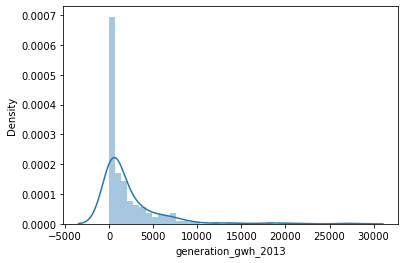

In [215]:
sn.distplot(df['generation_gwh_2013'])

In [216]:
for i in range(len(df['generation_gwh_2013'])):
    if str(df['generation_gwh_2013'][i])=='nan':
        df['generation_gwh_2013'][i]=df['generation_gwh_2013'].mean()

##### fill missing values of generation_gwh_2014

<AxesSubplot:xlabel='generation_gwh_2014', ylabel='Density'>

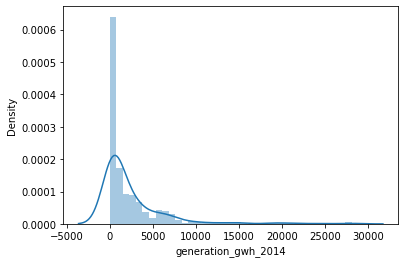

In [217]:
sn.distplot(df['generation_gwh_2014'])

In [218]:
for i in range(len(df['generation_gwh_2014'])):
    if str(df['generation_gwh_2014'][i])=='nan':
        df['generation_gwh_2014'][i]=df['generation_gwh_2014'].mean()

##### fill missing values of generation_gwh_2015

<AxesSubplot:xlabel='generation_gwh_2015', ylabel='Density'>

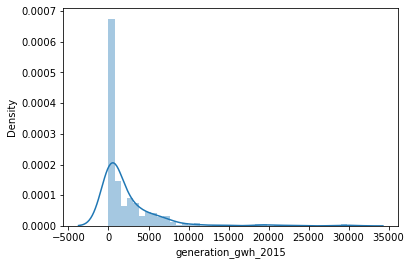

In [219]:
sn.distplot(df['generation_gwh_2015'])

In [220]:
for i in range(len(df['generation_gwh_2015'])):
    if str(df['generation_gwh_2015'][i])=='nan':
        df['generation_gwh_2015'][i]=df['generation_gwh_2015'].mean()

##### fill missing values of generation_gwh_2016

<AxesSubplot:xlabel='generation_gwh_2016', ylabel='Density'>

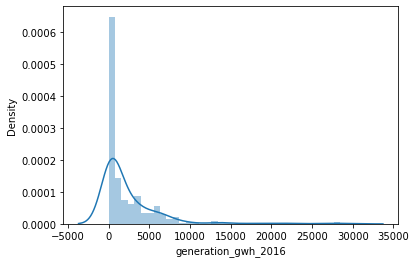

In [221]:
sn.distplot(df['generation_gwh_2016'])

In [222]:
for i in range(len(df['generation_gwh_2016'])):
    if str(df['generation_gwh_2016'][i])=='nan':
        df['generation_gwh_2016'][i]=df['generation_gwh_2016'].mean()

###### fill missing values of generation_gwh_2017

<AxesSubplot:xlabel='generation_gwh_2017', ylabel='Density'>

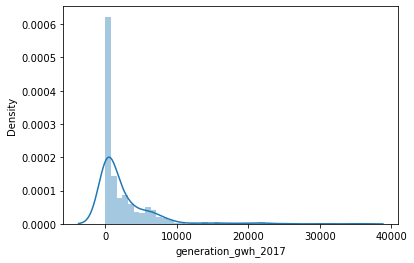

In [223]:
sn.distplot(df['generation_gwh_2017'])

In [224]:
for i in range(len(df['generation_gwh_2017'])):
    if str(df['generation_gwh_2017'][i])=='nan':
        df['generation_gwh_2017'][i]=df['generation_gwh_2017'].mean()

###### all missing values are now filled

In [225]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   capacity_mw          908 non-null    float64
 1   primary_fuel         908 non-null    object 
 2   geolocation_source   908 non-null    object 
 3   generation_gwh_2013  908 non-null    float64
 4   generation_gwh_2014  908 non-null    float64
 5   generation_gwh_2015  908 non-null    float64
 6   generation_gwh_2016  908 non-null    float64
 7   generation_gwh_2017  908 non-null    float64
 8   fuel_type            908 non-null    int64  
dtypes: float64(6), int64(1), object(2)
memory usage: 64.0+ KB


##### converting categorical column to numerical column

In [226]:
for col in df.columns:
    if df[col].dtypes == 'object':
        encoder = LabelEncoder()
        df[col] = encoder.fit_transform(df[col])

In [227]:
df

,capacity_mw,primary_fuel,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,fuel_type
0,2.5,6,1,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,0
1,98.0,1,2,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,1
2,39.2,7,2,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,0
3,135.0,2,2,631.777928,617.789264,843.747000,886.004428,663.774500,1
4,1800.0,1,2,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736,1
...,...,...,...,...,...,...,...,...,...
903,1600.0,1,2,2304.059202,2420.393316,0.994875,233.596650,865.400000,1
904,3.0,6,0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,0
905,25.5,7,2,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,0
906,80.0,1,2,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,1


In [228]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   capacity_mw          908 non-null    float64
 1   primary_fuel         908 non-null    int32  
 2   geolocation_source   908 non-null    int32  
 3   generation_gwh_2013  908 non-null    float64
 4   generation_gwh_2014  908 non-null    float64
 5   generation_gwh_2015  908 non-null    float64
 6   generation_gwh_2016  908 non-null    float64
 7   generation_gwh_2017  908 non-null    float64
 8   fuel_type            908 non-null    int64  
dtypes: float64(6), int32(2), int64(1)
memory usage: 56.9 KB


In [229]:
df.describe()

,capacity_mw,primary_fuel,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,fuel_type
count,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000
mean,321.046378,3.205947,1.724670,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,0.394273
std,580.221767,2.281339,0.686271,2465.930970,2665.360236,2860.146282,2878.730064,2923.041411,0.488963
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16.837500,1.000000,2.000000,1332.538825,1175.264825,874.205000,826.629750,852.438887,0.000000
50%,60.000000,3.000000,2.000000,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,0.000000
75%,388.125000,6.000000,2.000000,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,1.000000
max,4760.000000,7.000000,2.000000,27586.200000,28127.000000,30539.000000,30015.000000,35116.000000,1.000000


##### From the above description it is observed that columns like capacity_mw,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017 may contain outliers since there is a huge difference between 75% and max and their respective means and 50% also are significantly different

##### check data imbalancement and balance if required

In [230]:
print('Number of fuel_type are:',df['fuel_type'].value_counts()[0])
print('Number of fuel_type are:',df['fuel_type'].value_counts()[1])
print('Unbalanced dataset' if df['fuel_type'].value_counts()[0]!=df['fuel_type'].value_counts()[1] else 'Balanced dataset')

Number of fuel_type are: 550
Number of fuel_type are: 358
Unbalanced dataset


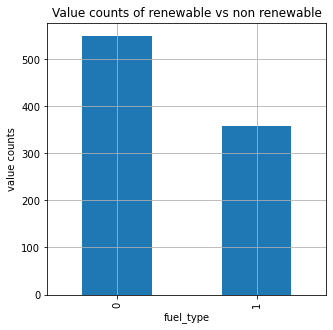

In [231]:
plt.figure(figsize=[5,5])
df['fuel_type'].value_counts().plot(kind='bar')
plt.xlabel("fuel_type")
plt.ylabel('value counts')
plt.title('Value counts of renewable vs non renewable')
plt.grid()

In [232]:
dfmin=df[df['fuel_type']==1]
dfmax=df[df['fuel_type']==0]
dfminup=resample(dfmin,replace=True,n_samples=550,random_state=123)
dff=pd.concat([dfmax, dfminup])
print('Number of fuel_type are:',dff['fuel_type'].value_counts()[0])
print('Number of fuel_type are:',dff['fuel_type'].value_counts()[1])
print('Unbalanced dataset' if dff['fuel_type'].value_counts()[0]!=dff['fuel_type'].value_counts()[1] else 'Balanced dataset')

Number of fuel_type are: 550
Number of fuel_type are: 550
Balanced dataset


#### Correlation

In [233]:
dff.corr()['fuel_type']

capacity_mw            0.433637
primary_fuel          -0.640162
geolocation_source     0.359684
generation_gwh_2013    0.193872
generation_gwh_2014    0.204994
generation_gwh_2015    0.203246
generation_gwh_2016    0.221738
generation_gwh_2017    0.235696
fuel_type              1.000000
Name: fuel_type, dtype: float64

<AxesSubplot:>

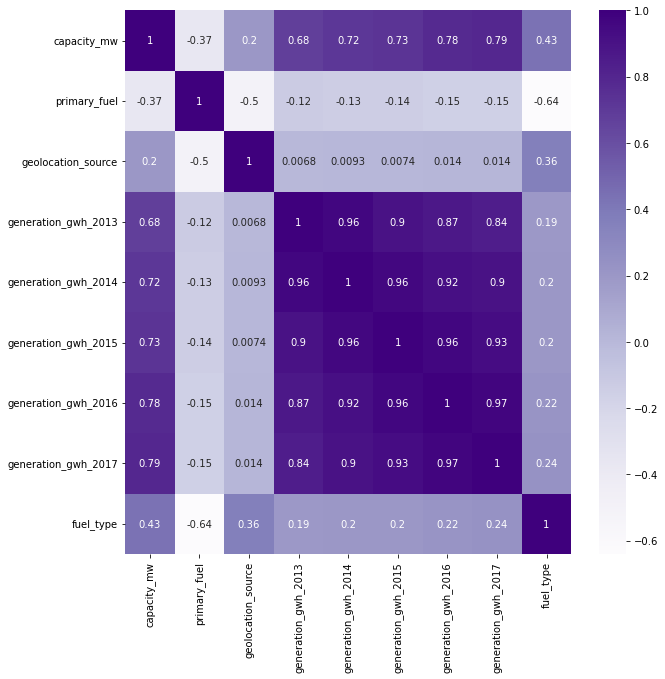

In [234]:
plt.figure(figsize=[10,10])
sn.heatmap(dff.corr(),annot=True,cmap='Purples')

#### check the graphical relation between fuel_type column and rest

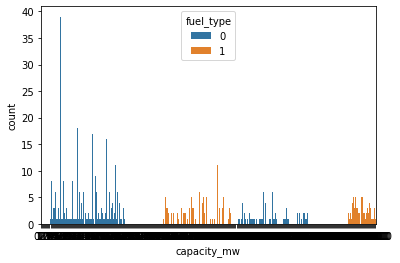

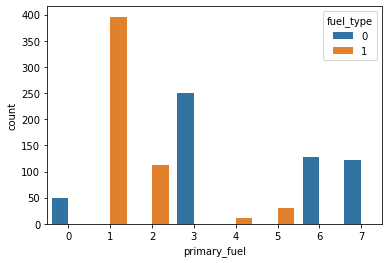

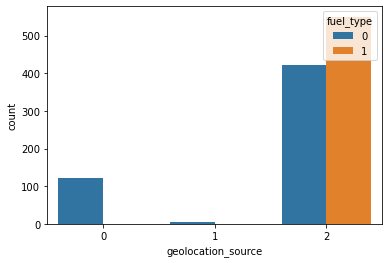

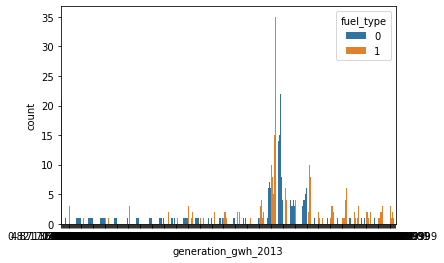

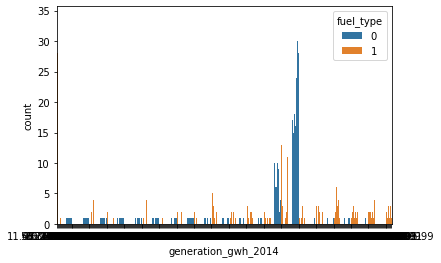

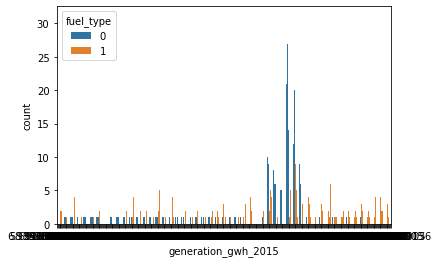

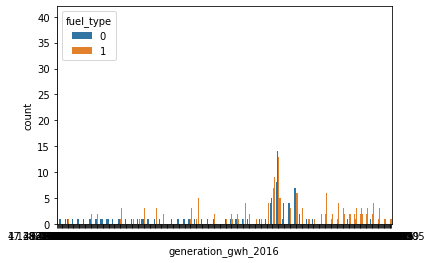

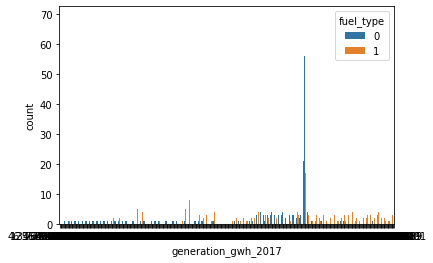

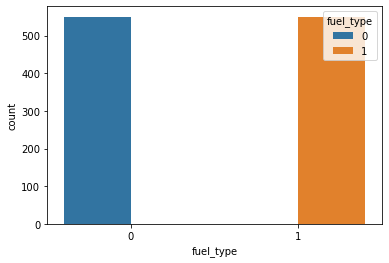

In [65]:
for i in dff.columns:
    sn.countplot(x=i,hue="fuel_type",data=dff)
    plt.show()

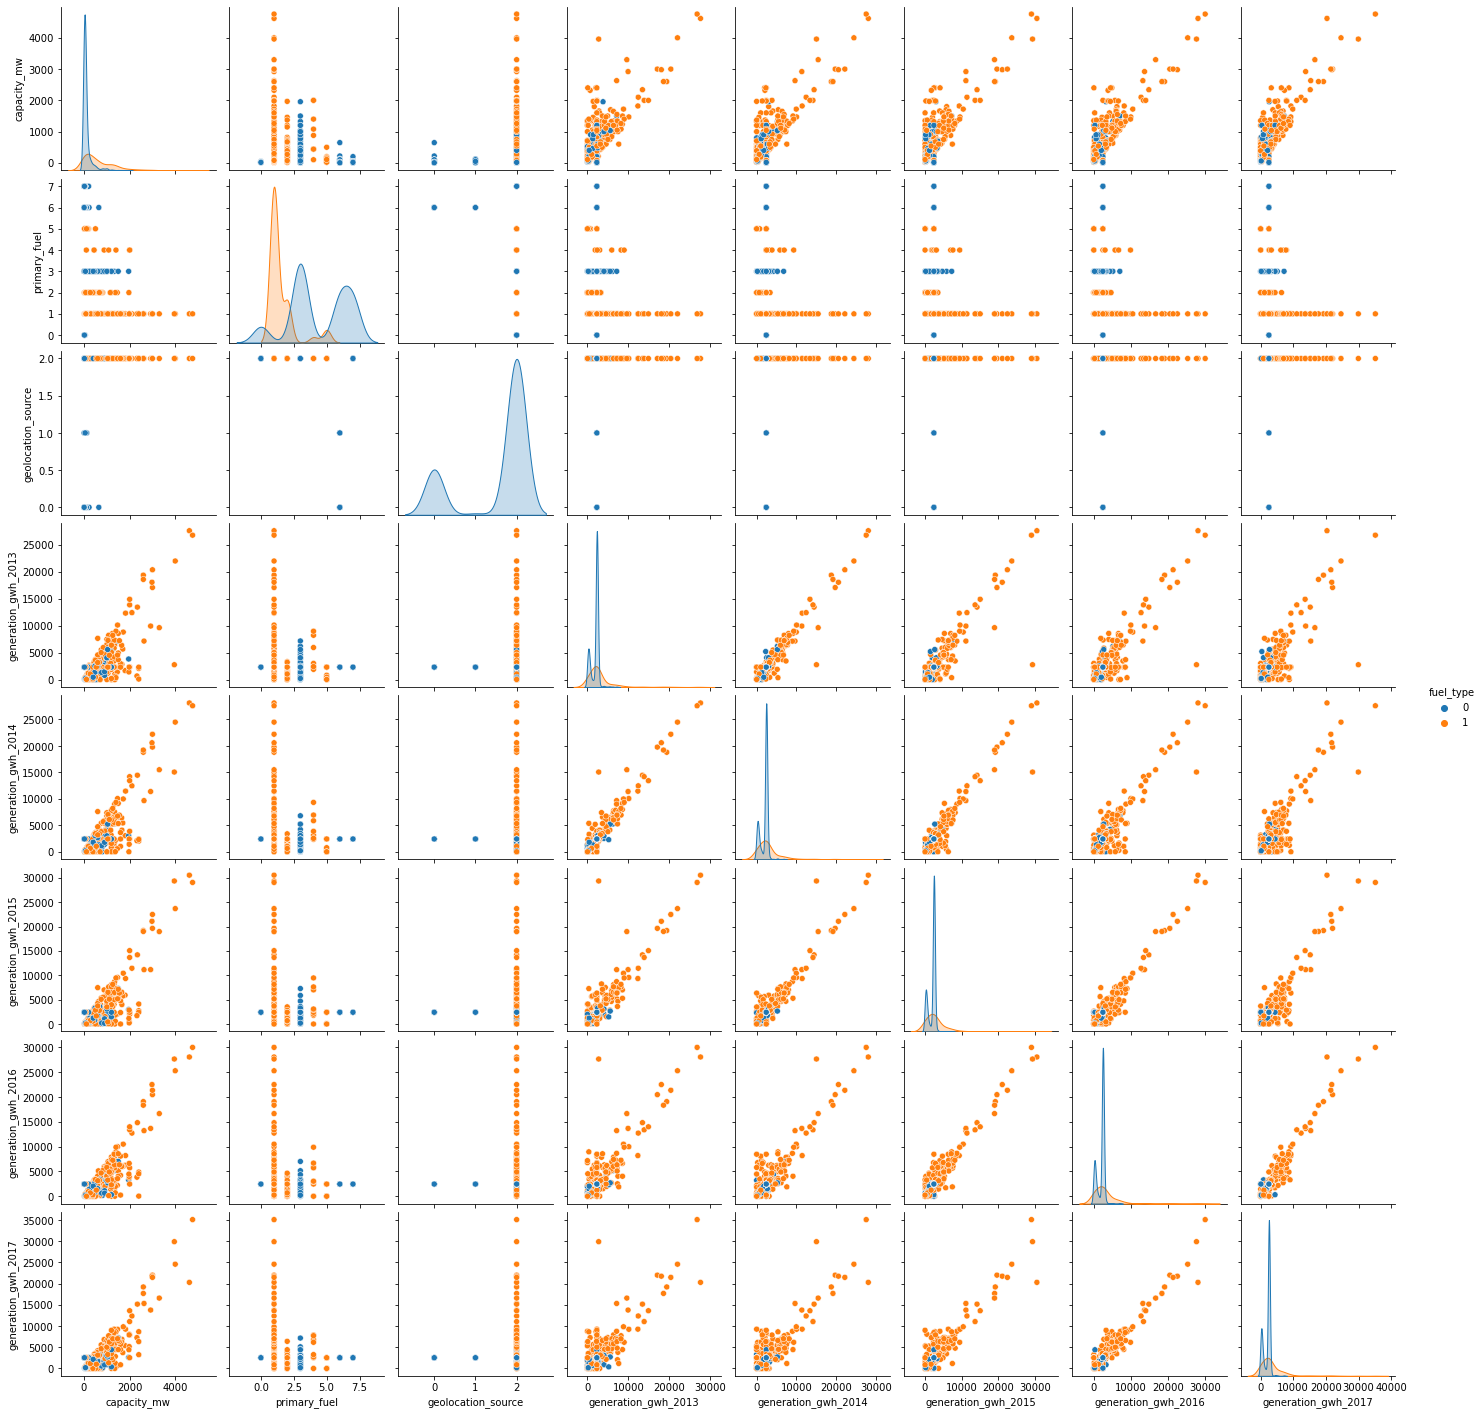

In [238]:
sn.pairplot(df,hue="fuel_type")

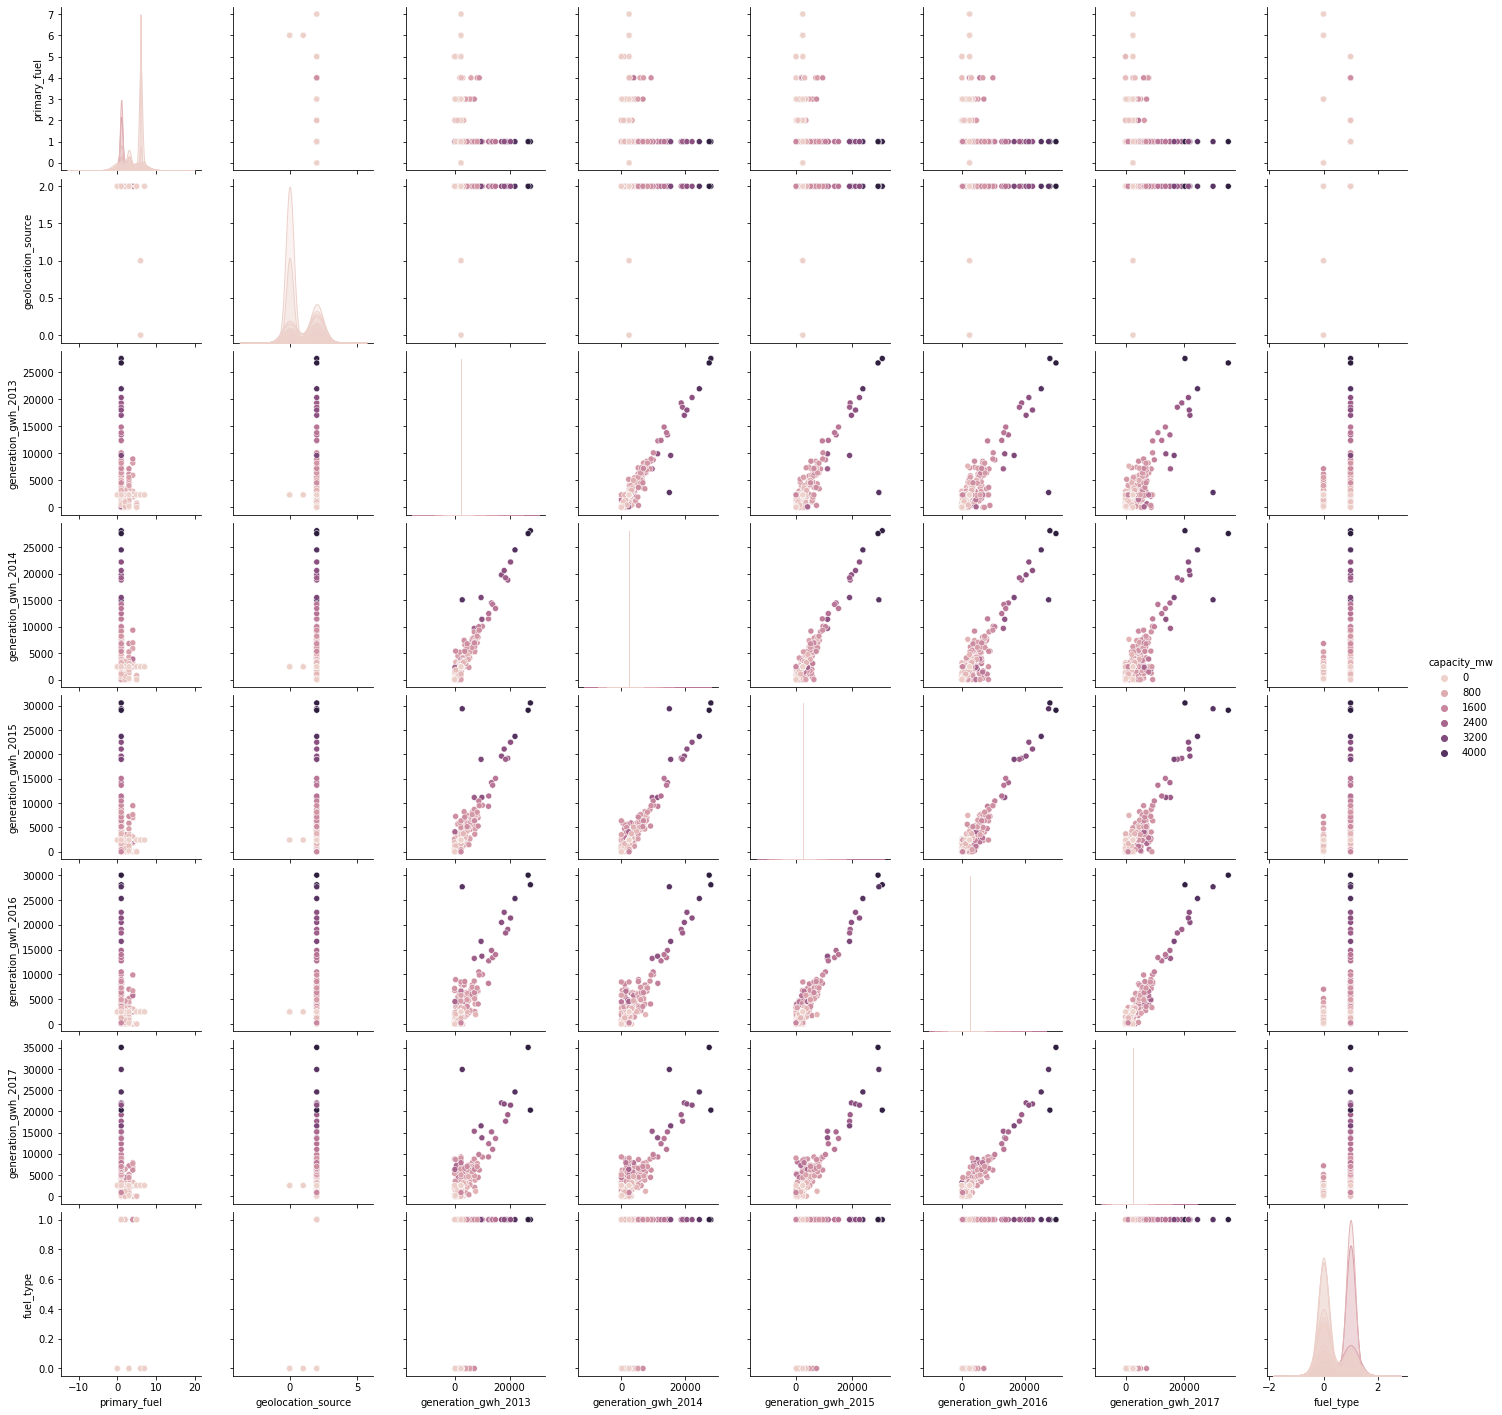

In [239]:
sn.pairplot(df,hue="capacity_mw")

##### check distribution plots of all columns

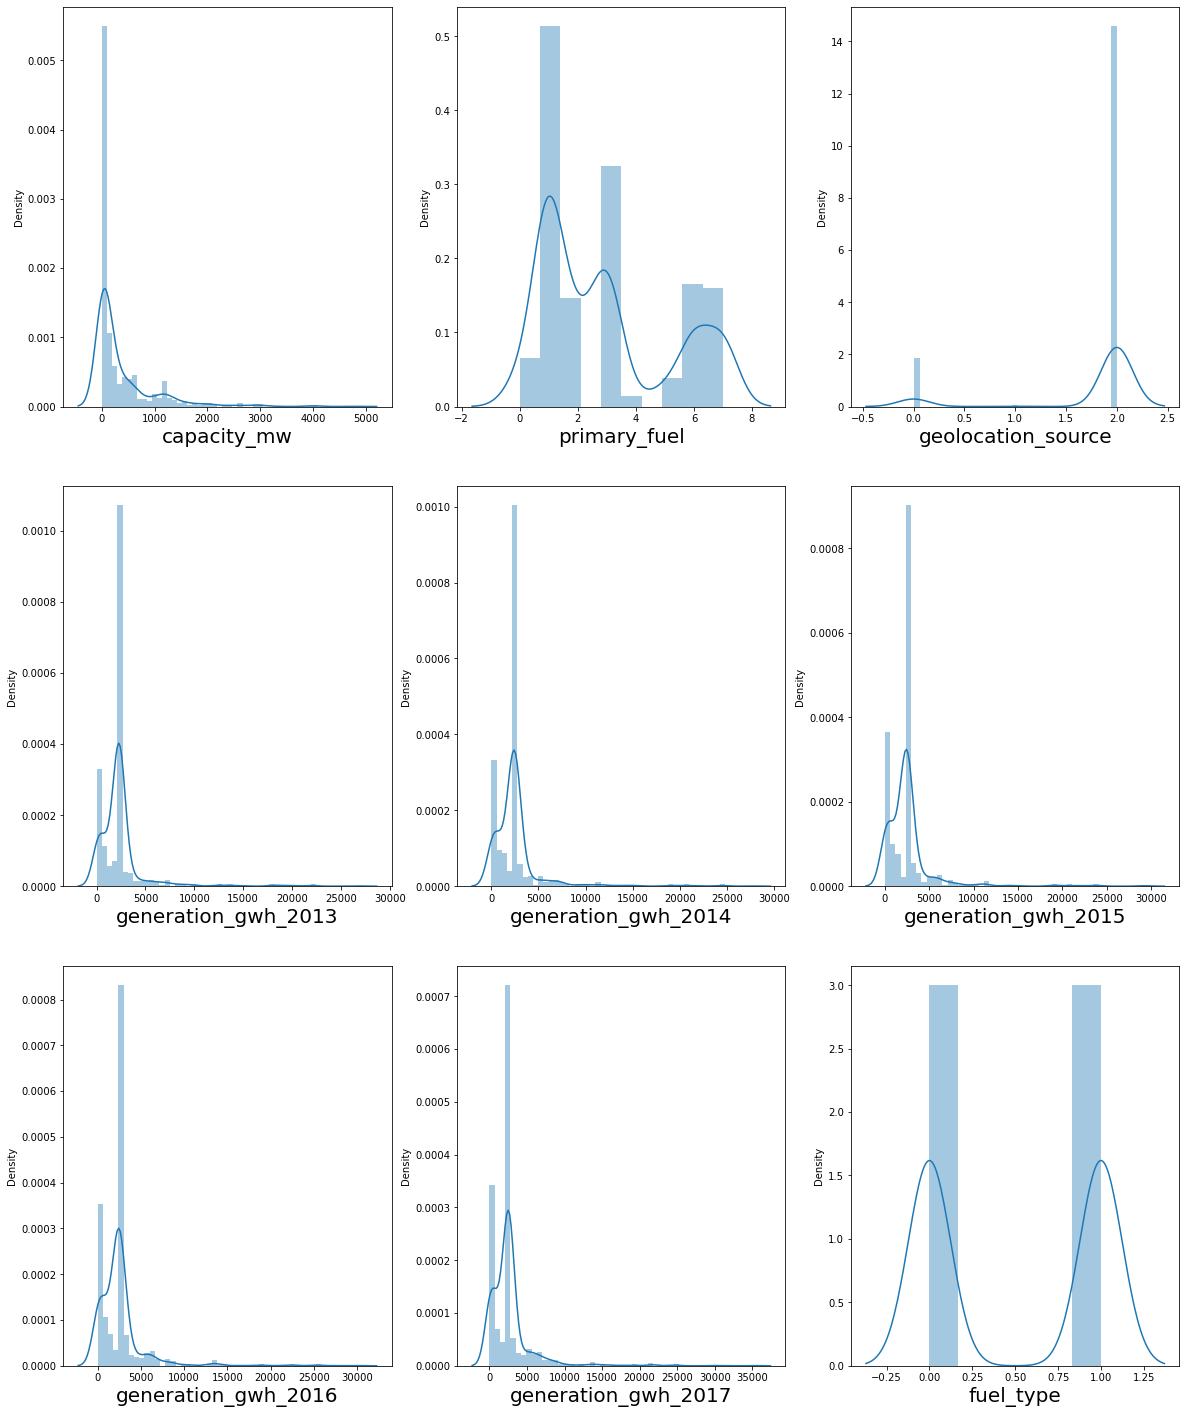

In [67]:
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1
for column in dff.columns:
    if plotnumber<=len(dff.columns):
        ax=plt.subplot(3,3,plotnumber)
        sn.distplot(dff[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

-columns having bimodal distribution plot: primary fuel, geolocation_source
-rest all columns have almost normal distribution plot being positively skewed

**check for outliers**`

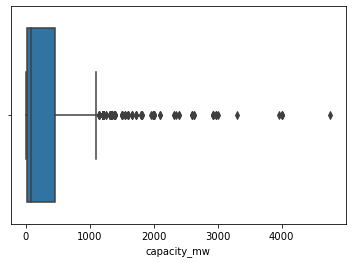

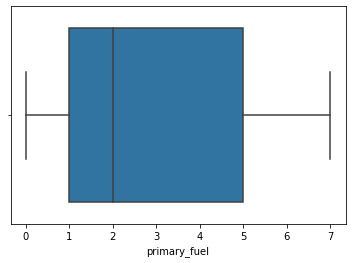

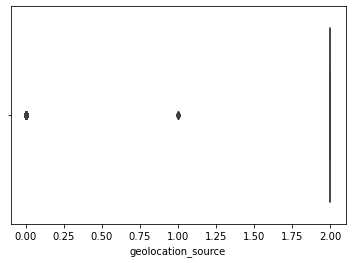

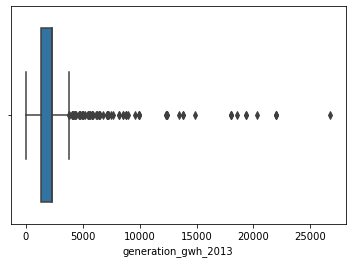

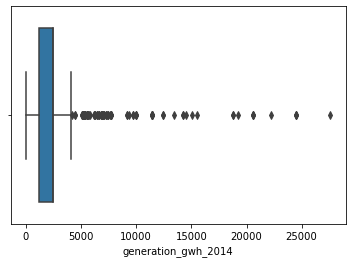

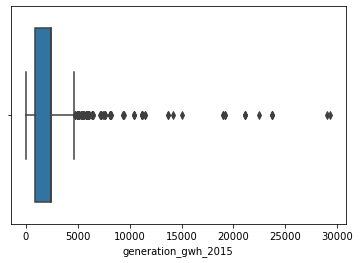

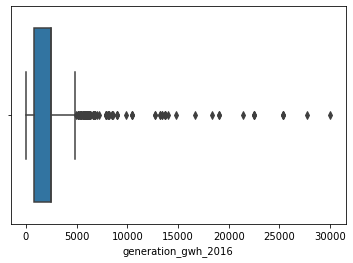

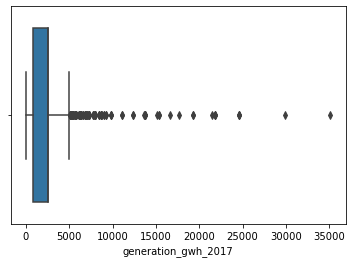

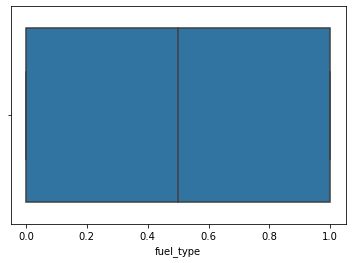

In [69]:
for i in dff.columns:
    sn.boxplot(dff[i])
    plt.show()

#### there are outliers present in all non categorical columns. try to remove them

In [70]:
z_scr=zscore(dff)
print(dff.shape)
df_new=dff.loc[(abs(z_scr)<3).all(axis=1)]
print(df_new.shape)

(1100, 9)
(1069, 9)


In [71]:
((1100-1069)/1100)*100

2.8181818181818183

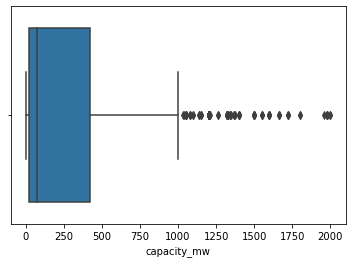

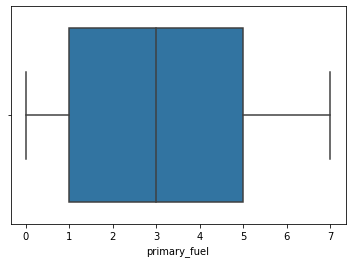

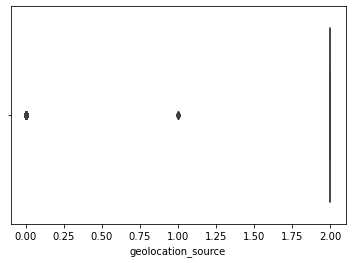

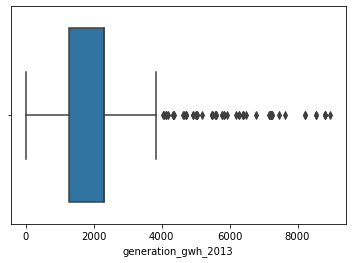

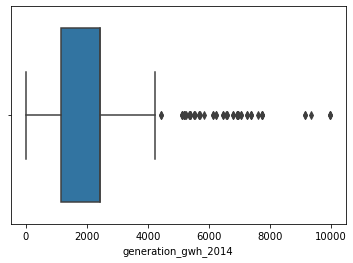

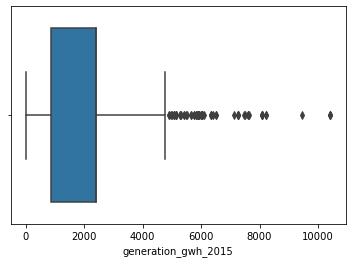

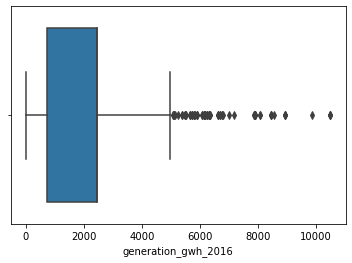

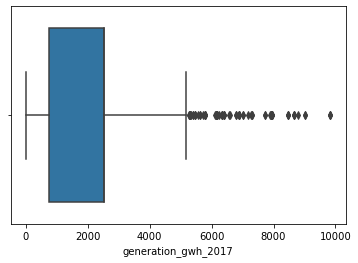

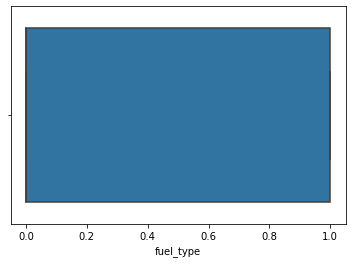

In [72]:
for i in df_new.columns:
    sn.boxplot(df_new[i])
    plt.show()

In [73]:
z_scr=zscore(df_new)
print(df_new.shape)
df=df_new.loc[(abs(z_scr)<3).all(axis=1)]
print(df.shape)

(1069, 9)
(1011, 9)


In [74]:
((1069-1011)/1069)*100

5.425631431244153

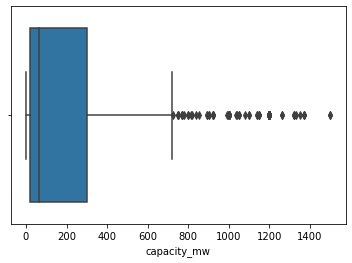

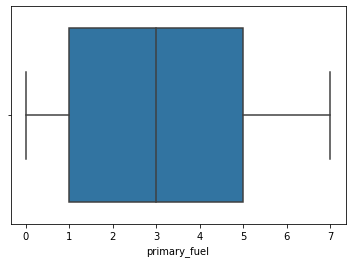

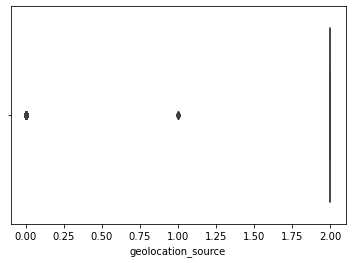

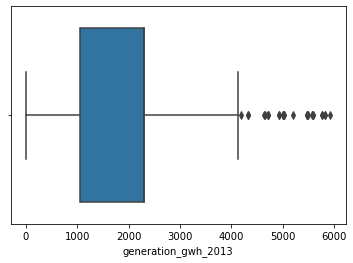

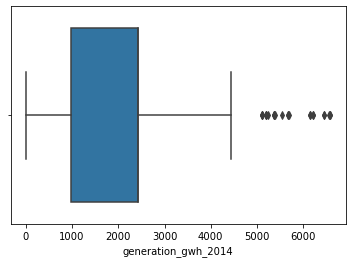

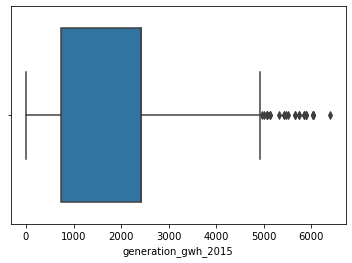

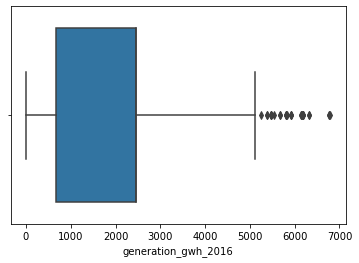

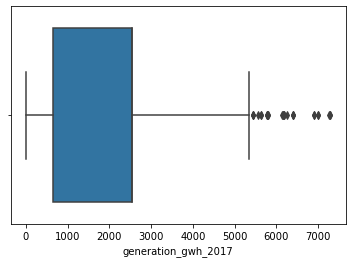

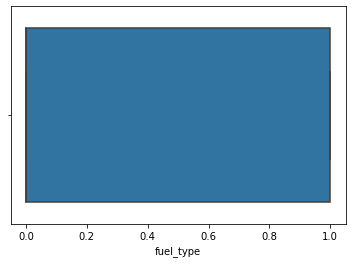

In [75]:
for i in df.columns:
    sn.boxplot(df[i])
    plt.show()

##### Any more try to remove ouliers will cause data loss of more than 10%

In [76]:
y = df[['fuel_type']]
x = df.drop(columns = ['fuel_type'])

#### Sknewness check

In [77]:
print(x.skew())
print(len(x.skew().loc[x.skew()>0.55]))

capacity_mw            1.871256
primary_fuel           0.608475
geolocation_source    -2.290045
generation_gwh_2013    0.195766
generation_gwh_2014    0.274341
generation_gwh_2015    0.291811
generation_gwh_2016    0.485093
generation_gwh_2017    0.531009
dtype: float64
2


In [78]:
for index in x.skew().index:
    if x.skew().loc[index] >0.55:
        x[index]=np.cbrt(x[index])

In [80]:
print(x.skew())
print(len(x.skew().loc[x.skew()>0.55]))

capacity_mw            0.712740
primary_fuel          -0.939354
geolocation_source    -2.290045
generation_gwh_2013    0.195766
generation_gwh_2014    0.274341
generation_gwh_2015    0.291811
generation_gwh_2016    0.485093
generation_gwh_2017    0.531009
dtype: float64
1


#### Feature scaling 

In [81]:
scaler = StandardScaler()
x[['capacity_mw','generation_gwh_2013','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017']] = scaler.fit_transform(x[['capacity_mw','generation_gwh_2013','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017']])
x

,capacity_mw,primary_fuel,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
0,-1.263773,1.817121,1,0.383492,0.396044,0.404651,0.388226,0.375983
2,-0.502153,1.912931,2,0.383492,0.396044,0.404651,0.388226,0.375983
6,-0.308790,1.442250,2,-1.642128,-1.560930,-1.469080,-1.467782,-1.428277
7,0.383509,1.442250,2,-1.126285,-1.113956,-0.997606,-0.991233,-0.992406
8,0.700923,1.442250,2,-1.306563,-1.281557,-1.475509,-1.203553,-1.169884
...,...,...,...,...,...,...,...,...
74,-0.966104,1.000000,2,0.383492,0.396044,0.404651,0.388226,0.375983
473,1.963288,1.000000,2,2.656603,2.723790,3.277927,3.285809,2.274357
190,1.963288,1.000000,2,2.087052,1.445088,1.866932,3.392801,3.072842
168,2.197244,1.000000,2,0.383492,-1.280389,3.240828,3.266904,1.050267


##### PCA for dimension reduction

In [82]:
for i in range(2,9):
    pca = PCA(n_components=i)
    principalComponents = pca.fit_transform(x)
    print(i,sum(pca.explained_variance_ratio_))

2 0.8118903265126294
3 0.8803254803353907
4 0.9333307939311902
5 0.9558950964719973
6 0.9773022351030569
7 0.9916282231210294
8 1.0


In [83]:
pca = PCA(n_components=5)
principalComponents = pca.fit_transform(x)

In [84]:
def besttrain(model,x,y):
    random=0
    score=0
    for i in range(42,100):
        x_train,x_test,y_train,y_test=train_test_split(x,y,random_state = i,test_size=0.20,stratify=y)
        model.fit(x_train,y_train)
        tmp=roc_auc_score(y_test,model.predict(x_test))
        #print(i,tmp)
        if tmp>score:
            score=tmp
            random=i
    print("maximum roc_auc_score is at random state :",random," and it is :",score)

#### Model building & Evaluation

In [85]:
models=[LogisticRegression(),DecisionTreeClassifier(),KNeighborsClassifier(),RandomForestClassifier(),SVC(),RidgeClassifier(),
        BaggingClassifier(),GradientBoostingClassifier(),SGDClassifier(),
       LGBMClassifier(),XGBClassifier(),ExtraTreesClassifier(),AdaBoostClassifier(),
       QuadraticDiscriminantAnalysis(),CalibratedClassifierCV(),LinearSVC(),NuSVC(),
       LinearDiscriminantAnalysis(),RidgeClassifierCV(),GaussianNB(),BernoulliNB(),
        PassiveAggressiveClassifier(),Perceptron(),DummyClassifier()]

In [86]:
for i in models:
    x_train,x_test,y_train,y_test=train_test_split(principalComponents,y,random_state = 42,test_size=0.20,stratify=y)
    scores=cross_val_score(i,x_train,y_train,cv=5,scoring='roc_auc')
    score=np.mean(scores)
    i.fit(x_train,y_train)
    y_pred=i.predict(x_test)
    if roc_auc_score(y_test,y_pred)>score:
        diff=roc_auc_score(y_test,y_pred)-score
        print('roc bigger')
    else:
        diff=score-roc_auc_score(y_test,y_pred)
    print('*'*10)
    print(i)
    print('score',score)
    print('roc',roc_auc_score(y_test,y_pred))
    print('diff',diff)

**********
LogisticRegression()
score 0.8626077645043161
roc 0.7101661779081132
diff 0.15244158659620288
**********
DecisionTreeClassifier()
score 0.9455217317631112
roc 0.9148582600195504
diff 0.030663471743560766
**********
KNeighborsClassifier()
score 0.9609436654522859
roc 0.8974584555229718
diff 0.06348520992931417
**********
RandomForestClassifier()
score 0.9925279307520686
roc 0.9503910068426198
diff 0.04213692390944879
**********
SVC()
score 0.8772045572217987
roc 0.7924242424242424
diff 0.08478031479755632
**********
RidgeClassifier()
score 0.8530974610974612
roc 0.7010263929618769
diff 0.15207106813558435
**********
BaggingClassifier()
score 0.9841074397281293
roc 0.9503910068426198
diff 0.03371643288550952
**********
GradientBoostingClassifier()
score 0.985957284871078
roc 0.9350928641251223
diff 0.05086442074595576
**********
SGDClassifier()
score 0.8308246773419187
roc 0.7015151515151514
diff 0.12930952582676725
**********
LGBMClassifier()
score 0.9922299650747928
roc 0.94

##### RandomForestClassifier is best model against evaluation metric and with least difference

### Hyperparameter tuning

In [92]:
parameters = {'n_estimators' : [100,200,500,1200] ,
         'max_depth': [4,8,12,16,20],
         'criterion' : ['gini','entropy'],
         'min_samples_leaf' : [2,4,6,8,10], 
         'min_samples_split' : [3,6,9,12,15],
         'max_features':["auto","sqrt","log2"]}
clf = RandomizedSearchCV(RandomForestClassifier(), parameters, cv=15,scoring="roc_auc",n_jobs=-1,verbose=1)
clf.fit(principalComponents,y)
clf.best_params_

Fitting 15 folds for each of 10 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   27.4s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:  1.6min finished


{'n_estimators': 1200,
 'min_samples_split': 6,
 'min_samples_leaf': 4,
 'max_features': 'log2',
 'max_depth': 16,
 'criterion': 'entropy'}

##### Finding best Random state

In [93]:
besttrain(RandomForestClassifier(n_estimators=1200,min_samples_split=6,min_samples_leaf=4,max_depth=16,criterion='entropy',max_features='log2'),principalComponents,y)

maximum roc_auc_score is at random state : 80  and it is : 0.9818181818181818


##### Fit the best model

In [94]:
x_train, x_test, y_train, y_test = train_test_split(principalComponents, y,random_state = 80,test_size=0.20,stratify=y)
classmodel=RandomForestClassifier(n_estimators=1200,min_samples_split=6,min_samples_leaf=4,max_depth=16,criterion='entropy',max_features='log2')
classmodel.fit(x_train,y_train)
y_pred=classmodel.predict(x_test)

#### Metrics of the best model

In [95]:
print("Confusion matrix \n",confusion_matrix(y_test,y_pred))
print("f1 score is : ",f1_score(y_test,y_pred))
print("classification report \n",classification_report(y_test,y_pred))
print("AUC ROC Score: ",roc_auc_score(y_test,y_pred))
scores=cross_val_score(classmodel,principalComponents,y,cv=5,scoring='roc_auc')
score=np.mean(scores)
std=np.std(scores)
print('CV mean',score)
print('std:',std)

Confusion matrix 
 [[106   4]
 [  0  93]]
f1 score is :  0.9789473684210526
classification report 
               precision    recall  f1-score   support

           0       1.00      0.96      0.98       110
           1       0.96      1.00      0.98        93

    accuracy                           0.98       203
   macro avg       0.98      0.98      0.98       203
weighted avg       0.98      0.98      0.98       203

AUC ROC Score:  0.9818181818181818
CV mean 0.9872455813848301
std: 0.0026330640218698164


##### test on full dataset

In [96]:
y_pred=classmodel.predict(principalComponents)
print("Confusion matrix \n",confusion_matrix(y,y_pred))
print("f1 score is : ",f1_score(y,y_pred))
print("classification report \n",classification_report(y,y_pred))
print("AUC ROC Score: ",roc_auc_score(y,y_pred))
scores=cross_val_score(classmodel,principalComponents,y,cv=5,scoring='roc_auc')
score=np.mean(scores)
std=np.std(scores)
print('CV mean',score)
print('std:',std)

Confusion matrix 
 [[534  13]
 [  2 462]]
f1 score is :  0.9840255591054313
classification report 
               precision    recall  f1-score   support

           0       1.00      0.98      0.99       547
           1       0.97      1.00      0.98       464

    accuracy                           0.99      1011
   macro avg       0.98      0.99      0.99      1011
weighted avg       0.99      0.99      0.99      1011

AUC ROC Score:  0.9859618294143604
CV mean 0.98756160755749
std: 0.002578041890301146


### AUC_ROC Curve

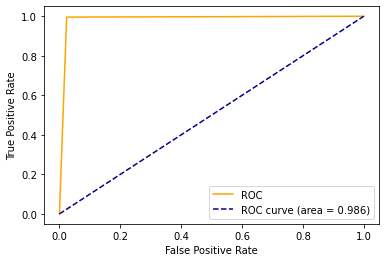

In [97]:
fpr, tpr, threshold = roc_curve(y,y_pred)
auc = roc_auc_score(y,y_pred)
plt.plot(fpr, tpr, color ='orange', label ='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--', label ='ROC curve (area = %0.3f)'% auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [98]:
x['fuel_typepred']=y_pred
x['fuel_type']=y
x[['fuel_type','fuel_typepred']]

,fuel_type,fuel_typepred
0,0,0
2,0,0
6,0,0
7,0,0
8,0,0
...,...,...
74,1,1
473,1,1
190,1,1
168,1,1


In [99]:
print('Number of falsely predicted fuel_type nonrenewable',x.fuel_type.value_counts()[1]-x.fuel_typepred.value_counts()[1])

Number of falsely predicted fuel_type nonrenewable -11


In [100]:
print('Number of falsely predicted fuel_type renewable',x.fuel_typepred.value_counts()[0]-x.fuel_type.value_counts()[0])

Number of falsely predicted fuel_type renewable -11


#### Distribution plot of both

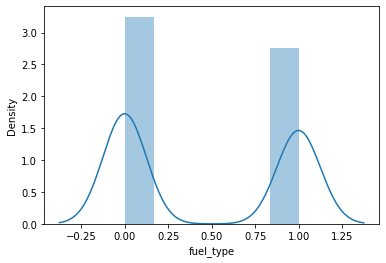

<AxesSubplot:xlabel='fuel_typepred', ylabel='Density'>

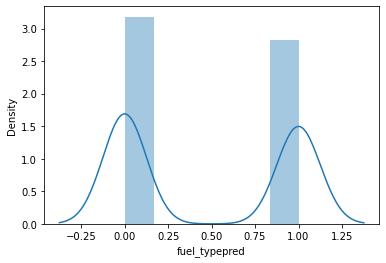

In [101]:
sn.distplot(x['fuel_type'])
plt.show()
sn.distplot(x['fuel_typepred'])

<AxesSubplot:>

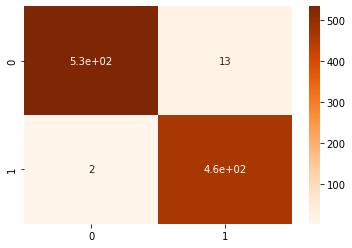

In [102]:
sn.heatmap(confusion_matrix(x['fuel_type'],x['fuel_typepred']),annot=True,cmap="Oranges",xticklabels=classmodel.classes_
               ,yticklabels=classmodel.classes_)

#### Saving the best model`

In [103]:
joblib.dump(classmodel, 'fuel_type.pkl')

['fuel_type.pkl']

#### regression part

In [104]:
y = df[['capacity_mw']]
x = df.drop(columns = ['capacity_mw'])
x

,primary_fuel,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,fuel_type
0,6,1,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,0
2,7,2,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,0
6,3,2,147.568450,157.558250,152.195200,61.421350,89.629600,0
7,3,2,696.738800,674.391100,721.335200,675.724400,679.594950,0
8,3,2,504.813250,480.594950,144.434200,402.029750,439.372100,0
...,...,...,...,...,...,...,...,...
74,1,2,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,1
473,1,2,4724.030000,5111.950000,5882.550000,6189.110000,5101.265600,1
190,1,2,4117.682000,3633.396000,4179.266000,6327.030000,6182.040900,1
168,1,2,2304.059202,481.945750,5837.766000,6164.740000,3444.420000,1


#### Skewness check

In [105]:
print(x.skew())
print(len(x.skew().loc[x.skew()>0.55]))

primary_fuel           0.608475
geolocation_source    -2.290045
generation_gwh_2013    0.195766
generation_gwh_2014    0.274341
generation_gwh_2015    0.291811
generation_gwh_2016    0.485093
generation_gwh_2017    0.531009
fuel_type              0.164995
dtype: float64
1


In [106]:
for index in x.skew().index:
    if x.skew().loc[index] >0.55:
        x[index]=np.cbrt(x[index])

In [107]:
print(x.skew())
print(len(x.skew().loc[x.skew()>0.55]))

primary_fuel          -0.939354
geolocation_source    -2.290045
generation_gwh_2013    0.195766
generation_gwh_2014    0.274341
generation_gwh_2015    0.291811
generation_gwh_2016    0.485093
generation_gwh_2017    0.531009
fuel_type              0.164995
dtype: float64
0


#### Feature scaling 

In [108]:
scaler = StandardScaler()
x[['generation_gwh_2013','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017']] = scaler.fit_transform(x[['generation_gwh_2013','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017']])
x

,primary_fuel,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,fuel_type
0,1.817121,1,0.383492,0.396044,0.404651,0.388226,0.375983,0
2,1.912931,2,0.383492,0.396044,0.404651,0.388226,0.375983,0
6,1.442250,2,-1.642128,-1.560930,-1.469080,-1.467782,-1.428277,0
7,1.442250,2,-1.126285,-1.113956,-0.997606,-0.991233,-0.992406,0
8,1.442250,2,-1.306563,-1.281557,-1.475509,-1.203553,-1.169884,0
...,...,...,...,...,...,...,...,...
74,1.000000,2,0.383492,0.396044,0.404651,0.388226,0.375983,1
473,1.000000,2,2.656603,2.723790,3.277927,3.285809,2.274357,1
190,1.000000,2,2.087052,1.445088,1.866932,3.392801,3.072842,1
168,1.000000,2,0.383492,-1.280389,3.240828,3.266904,1.050267,1


##### Multicolinearity check 

In [111]:
vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(x.values,i) for i in range(x.shape[1]) ]
vif["Features"] = x.columns
vif

,vif,Features
0,3.553579,primary_fuel
1,5.373611,geolocation_source
2,6.116052,generation_gwh_2013
3,8.204896,generation_gwh_2014
4,7.949113,generation_gwh_2015
5,9.578188,generation_gwh_2016
6,5.789614,generation_gwh_2017
7,2.237608,fuel_type


#### Multicollinearity only affects the coefficients and p-values, but it does not influence the model’s ability to predict the dependent variable

#### drop columns with highest vif

In [113]:
x=x.drop(['generation_gwh_2016'],axis=1)
vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(x.values,i) for i in range(x.shape[1]) ]
vif["Features"] = x.columns
vif

,vif,Features
0,3.552363,primary_fuel
1,5.368661,geolocation_source
2,5.978035,generation_gwh_2013
3,7.894171,generation_gwh_2014
4,5.410390,generation_gwh_2015
5,3.036435,generation_gwh_2017
6,2.234161,fuel_type


In [114]:
x=x.drop(['generation_gwh_2014'],axis=1)
vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(x.values,i) for i in range(x.shape[1]) ]
vif["Features"] = x.columns
vif

,vif,Features
0,3.551697,primary_fuel
1,5.368214,geolocation_source
2,2.892525,generation_gwh_2013
3,4.483106,generation_gwh_2015
4,3.035024,generation_gwh_2017
5,2.234109,fuel_type


#### PCA for dimension reduction

In [115]:
for i in range(2,7):
    pca = PCA(n_components=i)
    principalComponents = pca.fit_transform(x)
    print(i,sum(pca.explained_variance_ratio_))

2 0.8005670186805476
3 0.8801850034163371
4 0.930819970603361
5 0.9688155080486662
6 0.9999999999999999


In [116]:
pca = PCA(n_components=5)
principalComponents = pca.fit_transform(x)

In [117]:
def besttrain(model,x,y):
    random=0
    score=0
    for i in range(42,100):
        x_train,x_test,y_train,y_test=train_test_split(x,y,random_state = i,test_size=0.20,shuffle=True)
        model.fit(x_train,y_train)
        tmp=r2_score(y_test,model.predict(x_test))
        if tmp>score:
            score=tmp
            random=i
    return random

#### Model building & evaluation

In [118]:
models=[GradientBoostingRegressor(),NuSVR(),LinearRegression(),Ridge(),RidgeCV(),BayesianRidge(),SGDRegressor(),SVR(),
        AdaBoostRegressor(),LinearSVR(),KNeighborsRegressor(),RandomForestRegressor(),BaggingRegressor(),
       DecisionTreeRegressor(),LGBMRegressor(), XGBRFRegressor(),XGBRegressor()]

In [120]:
for i in models:
    x_train,x_test,y_train,y_test=train_test_split(principalComponents,y,random_state = 42,test_size=0.20)
    scores=cross_val_score(i,x_train,y_train,cv=5,scoring='r2')
    score=np.mean(scores)
    i.fit(x_train,y_train)
    y_pred=i.predict(x_test)
    if r2_score(y_test,y_pred)>score:
        diff=r2_score(y_test,y_pred)-score
    else:
        diff=score-r2_score(y_test,y_pred)
    print('*'*10)
    print(i)
    print('score',score)
    print('r2',r2_score(y_test,y_pred))
    print('diff',diff)
    print('mae',mean_absolute_error(y_test, y_pred))
    print('rmse',np.sqrt(mean_squared_error(y_test, y_pred)))

**********
GradientBoostingRegressor()
score 0.8365347926530374
r2 0.8209620185963035
diff 0.015572774056733962
mae 71.31321667335271
rmse 134.6873690192591
**********
NuSVR()
score 0.027976382574677848
r2 0.061345070206626495
diff 0.03336868763194865
mae 201.03148400476928
rmse 308.39495570812585
**********
LinearRegression()
score 0.2994043266926944
r2 0.09461545700114127
diff 0.20478886969155313
mae 218.597019086374
rmse 302.8801565303682
**********
Ridge()
score 0.29951341168184537
r2 0.09527863110139978
diff 0.20423478058044559
mae 218.59943108692588
rmse 302.7692097110778
**********
RidgeCV(alphas=array([ 0.1,  1. , 10. ]))
score 0.2999720079880974
r2 0.10069317816504697
diff 0.19927882982305045
mae 218.6325186659784
rmse 301.8618484209356
**********
BayesianRidge()
score 0.29981530785676946
r2 0.0977969670692529
diff 0.20201834078751657
mae 218.61170935620964
rmse 302.3475296485495
**********
SGDRegressor()
score 0.29838543674926027
r2 0.09486979142016949
diff 0.2035156453290907

#### RandomForestRegressor is best model against all metrics and least difference 

In [128]:
parameters={'n_estimators':[int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)],
           'min_samples_split':[2, 5, 10, 15, 100],
           'min_samples_leaf':[1, 2, 5, 10],
           'max_depth':[int(x) for x in np.linspace(5, 30, num = 6)],
           'criterion' : ['mse','mae'],
           'max_features':['auto','sqrt','log2'],   
}

In [129]:
clf = RandomizedSearchCV(RandomForestRegressor(), parameters,scoring="r2",cv=10,n_jobs=-1,verbose=1)

In [130]:
clf.fit(principalComponents,y)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  3.6min finished


RandomizedSearchCV(cv=10, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'criterion': ['mse', 'mae'],
                                        'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   scoring='r2', verbose=1)

In [131]:
clf.best_params_

{'n_estimators': 600,
 'min_samples_split': 10,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 30,
 'criterion': 'mae'}

#### Finding best random state

In [132]:
besttrain(RandomForestRegressor(n_estimators=600,min_impurity_split=10,min_samples_leaf=1,max_features='sqrt',max_depth=30,criterion='mae'),principalComponents,y)

51

In [134]:
x_train,x_test,y_train,y_test=train_test_split(principalComponents, y,random_state = 51,test_size=0.20,shuffle=True)
model= RandomForestRegressor(n_estimators=600,min_impurity_split=10,min_samples_leaf=1,max_features='sqrt',max_depth=30,criterion='mae')
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
score=r2_score(y_test,y_pred)
print('coeff of determination is:',score)
print('mean absolute error:',mean_absolute_error(y_test,y_pred))
print('mean squared error:',mean_squared_error(y_test,y_pred))
print('root mean square error:',np.sqrt(mean_squared_error(y_test,y_pred)))
scores =cross_val_score(model,x,y,cv=5)
print('cross val score',scores.mean())
print('std err',scores.std())

coeff of determination is: 0.9676997198263154
mean absolute error: 33.18968005747126
mean squared error: 3854.396100643069
root mean square error: 62.08378291182866
cross val score 0.8071217332018368
std err 0.0867500803482323


In [135]:
dfd=pd.DataFrame(x_test)
dfd

,0,1,2,3,4
0,5.660732,-0.785041,-0.641233,-0.038460,0.049978
1,-0.985786,-0.545282,0.320338,-0.441113,-0.204383
2,0.667243,-0.563733,-0.045472,0.119884,0.116880
3,0.654900,0.101071,-2.090178,0.302211,-0.467523
4,0.669926,-0.598389,0.000324,-0.315693,0.061987
...,...,...,...,...,...
198,-1.946464,-0.477137,-0.253107,-0.519606,0.057048
199,1.157038,-0.704327,1.380782,-0.439712,-1.730492
200,0.629773,0.219820,-0.063881,0.702918,-0.142910
201,0.782731,1.769528,0.108315,-0.458786,0.057270


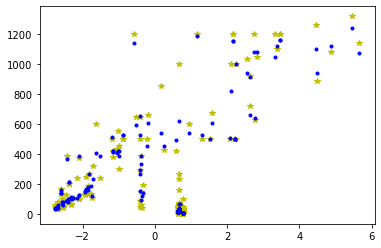

In [136]:
plt.plot(dfd[0],y_test,'y*')
plt.plot(dfd[0],y_pred,'b.')

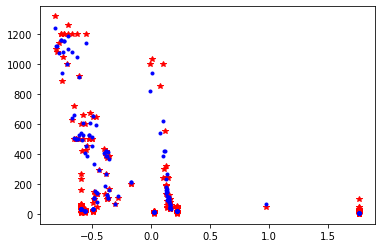

In [137]:
plt.plot(dfd[1],y_test,'r*')
plt.plot(dfd[1],y_pred,'b.')

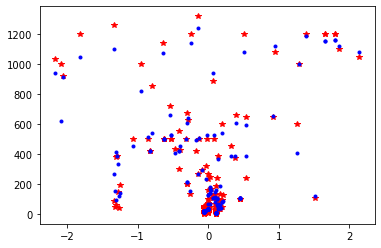

In [138]:
plt.plot(dfd[2],y_test,'r*')
plt.plot(dfd[2],y_pred,'b.')

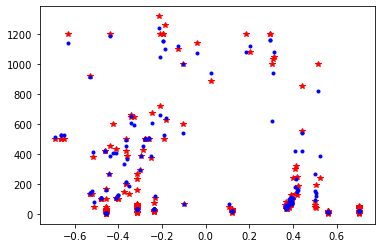

In [139]:
plt.plot(dfd[3],y_test,'r*')
plt.plot(dfd[3],y_pred,'b.')

In [140]:
y_pred=model.predict(principalComponents)
data=x
data['capacity_mwPred']=[round(i) for i in y_pred]
data['capacity_mw']=y
data['differnce']=data['capacity_mw']-data['capacity_mwPred']
data

,primary_fuel,geolocation_source,generation_gwh_2013,generation_gwh_2015,generation_gwh_2017,fuel_type,capacity_mwPred,capacity_mw,differnce
0,1.817121,1,0.383492,0.404651,0.375983,0,69,2.5,-66.5
2,1.912931,2,0.383492,0.404651,0.375983,0,23,39.2,16.2
6,1.442250,2,-1.642128,-1.469080,-1.428277,0,44,60.0,16.0
7,1.442250,2,-1.126285,-0.997606,-0.992406,0,184,192.0,8.0
8,1.442250,2,-1.306563,-1.475509,-1.169884,0,246,290.0,44.0
...,...,...,...,...,...,...,...,...,...
74,1.000000,2,0.383492,0.404651,0.375983,1,36,10.0,-26.0
473,1.000000,2,2.656603,3.277927,2.274357,1,1003,1000.0,-3.0
190,1.000000,2,2.087052,1.866932,3.072842,1,1029,1000.0,-29.0
168,1.000000,2,0.383492,3.240828,1.050267,1,1081,1200.0,119.0


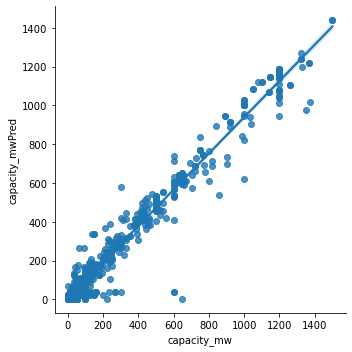

In [141]:
sn.lmplot(x='capacity_mw',y='capacity_mwPred',data=data,palette='rainbow')

<AxesSubplot:xlabel='capacity_mwPred', ylabel='Density'>

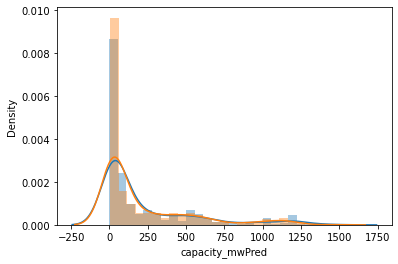

In [142]:
sn.distplot(data['capacity_mw'])
sn.distplot(data['capacity_mwPred'])

#### Save the model

In [143]:
joblib.dump(model,'capacity_mw.pkl')

['capacity_mw.pkl']